In [ ]:
from sdr.utils import matrix_generation
from sdr.lu.lu_decompose import lu_dcmp_tridiag
from sdr.lu.lu_solve import lu_slv_tridiag

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [ ]:
nblocks = 5
blocksize = 2
symmetric = False
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_blocktridiag(
    nblocks, blocksize, symmetric, diagonal_dominant, seed
)

# P_ref, L_ref, U_ref = la.lu(A)
lu_ref, p_ref = la.lu_factor(A)
L_sdr, U_sdr = lu_dcmp_tridiag(A, blocksize)

n_rhs = 1
B = np.random.randn(A.shape[0], n_rhs)

# --- Solving ---

X_ref = la.lu_solve((lu_ref, p_ref), B)
# Is equivalent to..
# Y_ref = la.solve_triangular(L_ref, B, lower=True)
# X_ref = la.solve_triangular(U_ref, Y_ref, lower=False)

fig, ax = plt.subplots(1, 3)
ax[0].set_title("X_ref: Reference lu solver")
ax[0].matshow(X_ref)

X_sdr = lu_slv_tridiag(L_sdr, U_sdr, B, blocksize)
ax[1].set_title("X_sdr: Selected lu solver")
ax[1].matshow(X_sdr)

X_diff = X_ref - X_sdr
ax[2].set_title("X_diff: Difference between X_ref and X_sdr")
ax[2].matshow(X_diff)
fig.colorbar(ax[2].matshow(X_diff), ax=ax[2], label="Relative error", shrink=0.4)

plt.show()



In [ ]:
#print(lu_ref)

plt.imshow(lu_ref, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Values')
plt.show()

print(p_ref)

In [ ]:
from sdr.utils import matrix_generation
from sdr.lu.lu_decompose import lu_dcmp_ndiags

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt


nblocks = 6
ndiags = 7
blocksize = 2
symmetric = False
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_block_ndiags(
    nblocks, ndiags, blocksize, symmetric, diagonal_dominant, seed
)


# --- Decomposition ---

P_ref, L_ref, U_ref = la.lu(A)

plt.matshow(P_ref)

fig, ax = plt.subplots(2, 3)
ax[0, 0].set_title("L_ref: Scipy lower factor")
ax[0, 0].matshow(L_ref)
ax[1, 0].set_title("U_ref: Scipy upper factor")
ax[1, 0].matshow(U_ref)

L_sdr, U_sdr = lu_dcmp_ndiags(A, ndiags, blocksize)
ax[0, 1].set_title("L_sdr: SDR lower factor")
ax[0, 1].matshow(L_sdr)
ax[1, 1].set_title("U_sdr: SDR upper factor")
ax[1, 1].matshow(U_sdr)

L_diff = L_ref - L_sdr
U_diff = U_ref - U_sdr
ax[0, 2].set_title("L: Difference between L_ref and L_sdr")
ax[0, 2].matshow(L_diff)
ax[1, 2].set_title("U: Difference between U_ref and U_sdr")
ax[1, 2].matshow(U_diff)
fig.colorbar(ax[0, 2].matshow(L_diff), ax=ax[0, 2], label="Relative error")
fig.colorbar(ax[1, 2].matshow(U_diff), ax=ax[1, 2], label="Relative error")


plt.show() 

In [ ]:
from sdr.lu.lu_solve import lu_slv_ndiags

## call solve now
n_rhs = 1
B = np.random.randn(A.shape[0], n_rhs)

Y_ref = la.solve_triangular(L_ref, B, lower=True)
X_ref = la.solve_triangular(U_ref, Y_ref, lower=False)

X_sdr = lu_slv_ndiags(L_sdr, U_sdr, B, ndiags, blocksize)

print("norm(X_ref - X_sdr) = ", np.linalg.norm(X_ref - X_sdr))

fig, ax = plt.subplots(1, 3)
ax[0].set_title("X_ref: Reference lu solver")
ax[0].matshow(X_ref)

ax[1].set_title("X_sdr: Selected lu solver")
ax[1].matshow(X_sdr)

X_diff = X_ref - X_sdr
ax[2].set_title("X_diff: Difference between X_ref and X_sdr")
ax[2].matshow(X_diff)
fig.colorbar(ax[2].matshow(X_diff), ax=ax[2], label="Relative error", shrink=0.4)

plt.show()


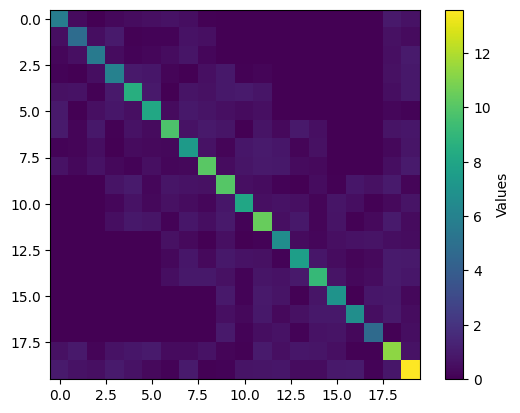

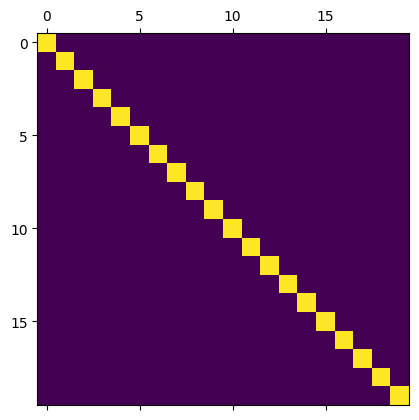

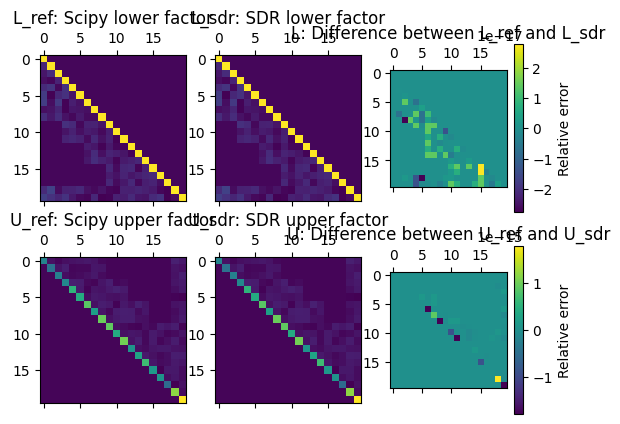

In [11]:
from sdr.lu.lu_decompose import lu_dcmp_ndiags_arrowhead

nblocks = 7
ndiags = 5
diag_blocksize = 3
arrow_blocksize = 2
symmetric = False
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_ndiags_arrowhead(
    nblocks, ndiags, diag_blocksize, arrow_blocksize, symmetric, 
    diagonal_dominant, seed
)

plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Values')
plt.show()

# --- Decomposition ---

P_ref, L_ref, U_ref = la.lu(A)

plt.matshow(P_ref)

fig, ax = plt.subplots(2, 3)
ax[0, 0].set_title("L_ref: Scipy lower factor")
ax[0, 0].matshow(L_ref)
ax[1, 0].set_title("U_ref: Scipy upper factor")
ax[1, 0].matshow(U_ref)

L_sdr, U_sdr = lu_dcmp_ndiags_arrowhead(A, nblocks, diag_blocksize, arrow_blocksize)
ax[0, 1].set_title("L_sdr: SDR lower factor")
ax[0, 1].matshow(L_sdr)
ax[1, 1].set_title("U_sdr: SDR upper factor")
ax[1, 1].matshow(U_sdr)

L_diff = L_ref - L_sdr
U_diff = U_ref - U_sdr
ax[0, 2].set_title("L: Difference between L_ref and L_sdr")
ax[0, 2].matshow(L_diff)
ax[1, 2].set_title("U: Difference between U_ref and U_sdr")
ax[1, 2].matshow(U_diff)
fig.colorbar(ax[0, 2].matshow(L_diff), ax=ax[0, 2], label="Relative error")
fig.colorbar(ax[1, 2].matshow(U_diff), ax=ax[1, 2], label="Relative error")

plt.show()

In [22]:
print(P_ref.shape[0])

#print(np.eye(P_ref.shape[0]))
if not np.is_equal(P_ref, np.eye(P_ref.shape[0]+1)):
    print("Reference LU solution is permuted!")
    exit()




20


ValueError: operands could not be broadcast together with shapes (20,20) (21,21) 

In [ ]:
from sdr.lu.lu_solve import lu_slv_ndiags_arrowhead

## call solve now
n_rhs = 3
B = np.random.randn(A.shape[0], n_rhs)

Y_ref = la.solve_triangular(L_ref, B, lower=True)
X_ref = la.solve_triangular(U_ref, Y_ref, lower=False)

X_sdr = lu_slv_ndiags_arrowhead(L_sdr, U_sdr, B, ndiags, diag_blocksize, arrow_blocksize)

print("norm(X_ref - X_sdr) = ", np.linalg.norm(X_ref - X_sdr))

fig, ax = plt.subplots(1, 3)
ax[0].set_title("X_ref: Reference lu solver")
ax[0].matshow(X_ref)

ax[1].set_title("X_sdr: Selected lu solver")
ax[1].matshow(X_sdr)

X_diff = X_ref - X_sdr
ax[2].set_title("X_diff: Difference between X_ref and X_sdr")
ax[2].matshow(X_diff)
fig.colorbar(ax[2].matshow(X_diff), ax=ax[2], label="Relative error", shrink=0.4)

plt.show()
